### Rescheduled Class
You should all have received an email concerning the 2 rescheduled class.
<br>Rescheduled classes will be held on: 
- 06/26 (June 26, Tuesday ), period 1, room CALL 23 
- 06/29 (June 29, Friday ), period 5, room CALL 23 

You may attend either class. 
<br>The content will be identical. 

__THERE IS A CLASS ON JUNE 25, MONDAY AS USUAL__

## Exam
A take-home exam with a time limit of 1 week will be issued on July 16 *instead of* the previously sheduled exam on July 23.

The deadline for the take-home exam will be July 23.

Please submit your exam solution by email.

## Please download the new class notes.
### Step 1 : Navigate to the directory where your files are stored.  
Open a terminal. 
<br>Using `cd`, navigate to *inside* the ILAS_Python_for_engineers folder on your computer. 
### Step 3 : Update the course notes by downloading the changes
In the terminal type:

>`git add -A
git commit -m "commit"
git fetch upstream
git merge -X theirs upstream/master`


# Root Finding and Coupled Equations.

<br> <a href='#SystemsCoupledEquations'>Systems of Coupled Equations</a>
    <br> &emsp;&emsp; <a href='#LinearEquations'>Linear Equations</a> 
        <br> &emsp;&emsp; &emsp;&emsp; <a href='#ExampleElectricalCircuit'>Example: An Electrical Circuit</a> 
    <br> &emsp;&emsp; <a href='#NonLinearEquations'>Linear Equations</a> 
<br> <a href='#RootFinding'>Root Finding</a> 
	<br> &emsp;&emsp; <a href='#IterativeSolutions'>Iterative Solutions</a> 
    <br> &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;<a href='#Bisection'>Bisection</a> 
        <br> &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; <a href='#ExampleBisectionAlgorithm'>Example: Bisection Algorithm</a> 
    <br> &emsp;&emsp;<a href='#ImportingSpecificAlgorithms'>Importing Specific Algorithms </a> 
    <br> &emsp;&emsp; <a href='#FindingnthRootPeriodicFunction'>Finding the nth Root of a Periodic Function</a> 
<br> <a href='#CoupledNonLinearEquations'>Coupled Non-Linear Equations (continued)</a> 
<br> <a href='#Summary'>Summary</a>
<br> <a href='#TestYourselfExercises'>Test-Yourself Exercises</a>


### Lesson Goal

Using computational solvers for:
- systems of coupled equations
- root finding

### Fundamental programming concepts
Importing solver algorithms for faster solutions. 

Solving mathematical problems programmatically can help you to reach an answer faster when compared to analytical methods. 

A simple example to demonstrate this point is solving a coupled set of equations.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

## Systems of Coupled Equations
<a id='SystemsCoupledEquations'></a>
### Linear Equations
<a id='LinearEquations'></a>

__Example :__ Given the equations below, find $x_1$, $x_2$ and $x_3$.

\begin{align*}
x_1 - x_2 + x_3 &= 0\\
10x_2 + 25x_3 &= 90\\
20x_1 + 10x_2 &= 80\\
\end{align*}



We have three equations and three unknown values so we can solve the equations, for example using substitution or elimitaion.

A faster way to solve this problem is to use the function `solve` from the Numpy linear algebra module. 

First the values from the right-hand-side and the coefficients from the left-hand-side are arranged as Numpy arrays.



In [24]:
A = np.array([[1, -1, 1],
              [0, 10, 25],
              [20, 10, 0]])

B = np.array([0, 90, 80])


If you are familiar with matrices, this is equivalent to expressing the form: 

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & -1 & 1  \\
0 & 10 & 25 \\
20 & 10 & 0 \\
\end{bmatrix}
}_{\mathbf{A}}
\cdot
\underbrace{
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
}_{\mathbf{x}}
=\underbrace{
\begin{bmatrix}
0 \\
90 \\
80 \\
\end{bmatrix}
}_{\mathbf{B}}
\end{equation*}

Notice that B appears in code as a horizontal array.

In Python, 1D arrays are ALWAYS represented horizontally. 

The array is treated as a row or column vector depending on the equation in which it appears.

`solve` solves linear equations of the form `ax = b` for x.



In [3]:
x = np.linalg.solve(A, B)
print(x)


[2. 4. 2.]


$x_1 = 2$
<br>$x_2 = 4$
<br>$x_3 = 2$

To verify that this is correct, we can find the matrix product or dot product of $\mathbf{A}$ and $\mathbf{x}$. 

(see 02_DataStructures_LibraryFunctions.ipynb for the dot product)

In [4]:
print(np.dot(A,x))


[ 0. 90. 80.]


The solution matches the original equation, which we can confim in code:

In [5]:
print(np.dot(A,x) == B)


[ True  True  True]


Example engineering problems with systems of coupled linear equations:
 - the force distribution in a truss structure 
 - the electrical current flowing in and out of each node in a circuit.
<img src="img/truss.gif" alt="Drawing" style="width: 600px;"/> 

### Example: An Electrical Circuit
<a id='ExampleElectricalCircuit'></a>
In electrical systems, network theory is the study of how to solve circuit problems. 
<br>The voltage and current in a closed circuit obey two simple rules;  
- Kirchoff's current law (first law)
- Kirchhoff's voltage law (second law)
<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 


#### Kichoff's Current Law

The algebraic sum of ALL the currents entering and leaving a junction must be equal to zero.

$\sum i_{in} - \sum i_{out} = 0 $


<img src="img/kirchhoffCurrentLaw.png" alt="Drawing" style="width: 200px;"/>

#### Kirchhoff's Voltage Law
For a closed loop series path the algebraic sum of all the *voltages* and *voltage drops* around any closed loop in a circuit is equal to zero.

$\sum E - \sum V = 0 $

<img src="img/kirchhoffVoltageLaw.png" alt="Drawing" style="width: 200px;"/> 


#### Electrical Elements Obey Ohm's Law 
The current through a conductor (I, units amps) is the voltage measured across the conductor (V, units volts) divided by the resistance (R, units Ohms).

$$V = IR$$


A Wheatstone bridge circuit is a very widely used circuit in scientific equipment.

<img src="img/Wheat4.png" alt="Drawing" style="width: 400px;"/> 




It is found in strain gauges, heart rate monitors, wind tunnels....etc.

Fundamentally, it is used to measure resistance.


<img src="img/Wheat1.png" alt="Drawing" style="width: 200px;"/> 

It has one voltage source, $E$.  

It has six branches with resistance: $R_1, R_2, R_3, R_4, R_5, R_6$.

__What is the current in each branch of the circuit?__



The circuit has:
 - 4 loops (A-D)
 - 4 nodes (a-d)
 

<img src="img/Wheat2.png" alt="Drawing" style="width: 400px;"/> 

 


We can use Kirchhoff's current law to equate the current flowing in and out of each node:

$\sum i_{in} - \sum i_{out} = 0 $

__Node a:__ &nbsp; $i_2 - i_4 - i_5 = 0$<br>
__Node b:__ &nbsp; $i_1 - i_2 - i_3 = 0$<br>
__Node c:__ &nbsp; $i_5 + i_6 - i_1 = 0$<br>
__Node d:__ &nbsp; $i_3 + i_4 - i_6 = 0$<br>

We can use Kirchoff's voltage law to equate the voltage and voltage drop in each loop: 
<br>$\sum V = \sum E$ 

__Loop A:__ &nbsp; $R_1 i_1 + R_2 i_2 + R_5 i_5 = E$<br>
__Loop B:__ &nbsp; $R_4 i_4 - R_5 i_5 + R_6 i_6 = 0$<br>
__Loop C:__ &nbsp; $R_2 i_2 - R_3 i_3 + R_4 i_4 = 0$<br>
__Loop D:__ &nbsp; $R_1 i_1 + R_2 i_2 + R_5 i_5 = E$

Where, $V=IR$ (Ohm's law)



We only need six equations to find the six unknown values $R_{1-6}$.

We can express the Loops A-C and Nodes a-c as coupled equations:
<br>$\sum E = \sum V = \sum iR$
<br>in the form:


\begin{equation*}
\underbrace{
\begin{bmatrix}
R_1 & R_2 & 0    & 0   &  R_5 & 0   \\
0   & 0   & 0    & R_4 & -R_5 & R_6 \\
0   & R_2 & -R_3 & R_4 &  0   & 0   \\
0   & 1   & 0    & -1  &  -1  & 0   \\
1   & -1  & -1   & 0   &  0   & 0   \\
-1  & 0   & 0    & 0   &  1   & 1   \\
\end{bmatrix}
}_{\mathbf{R}}
\cdot
\underbrace{
\begin{bmatrix}
i_1 \\
i_2 \\
i_3 \\
i_4 \\
i_5 \\
i_6 \\
\end{bmatrix}
}_{\mathbf{I}}
=\underbrace{
\begin{bmatrix}
E \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
}_{\mathbf{V}}
\end{equation*}

In [6]:
# Let's assign some values to our known variables:
R1, R2, R3, R4, R5, R6 = 300, 500, 1000, 500, 1000, 500
E = 5

# And create an array for R and V
R = np.array([[R1, R2,  0,   0,   R5, 0 ],
              [0,  0,   0,   R4, -R5, R6],
              [0,  R2, -R3,  R4,  0,  0 ], 
              [0,  1,   0,  -1,  -1,  0 ],
              [1, -1,  -1,   0,   0,  0 ],              
              [-1, 0,   0,   0,   1,  1]])

V = np.array([E, 0, 0, 0, 0, 0])



In [7]:
I = np.linalg.solve(R, V)
print(I)


[0.005 0.003 0.002 0.001 0.002 0.003]


Check your solution.
<br>The `@` symbol can be used as shorthand for `np.dot` to find the dot product. 

In [8]:
print(R @ I)
print(np.around(R @ I, 2))


[ 5.00000000e+00  0.00000000e+00  0.00000000e+00  1.30104261e-18
  2.16840434e-18 -2.16840434e-18]
[ 5.  0.  0.  0.  0. -0.]


This process is a fast and simple way to solve simultaneous linear equations, for example when compared to eilimination methods. 

##### Alternative Solution
We can find $\mathbf{I}$ by matrix multiplication:
\begin{align*}
\mathbf{R}\cdot\mathbf{I}&=\mathbf{V}\\
\end{align*}

but we have to rearrange the equation.

\begin{align*}
\mathbf{I}  &=\frac{\mathbf{V}}{\mathbf{R}}\\
            &=\mathbf{R^{-1}}\cdot\mathbf{V}\\
\end{align*}



The Numpy linear algebra module can be used to find the inverse of matrix $\mathbf{R}$.

In [9]:
R_inv = np.linalg.inv(R)

I = np.dot(R_inv, V)

print(I)


[0.005 0.003 0.002 0.001 0.002 0.003]


### Non-Linear Equations
<a id='NonLinearEquations'></a>
An example application of solving a coupled set of non-linear equations is finding the coefficients of a quadratic polynomial function, using three points that lie on the curve of the function.

The equation for a parabola is $y=ax^2+bx+c$, where $a$, $b$, and $c$ are constants.

The equation of a parabola can be fully defined using three points that lie on the curve (provided the curve is not a  straight line). 




Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$,
<br>three simultaneous equation may be written: 
$$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$$



__Example__

Given that:
<br>$(x_1,y_1)=(-2,2)$ 
<br>$(x_2,y_2)=(1,-1)$ 
<br>$(x_3,y_3)=(4,4)$

find $a$,$b$ and $c$.


Hint: 
<br>Build a 1D array, `y`
<br>Build a 2D array, `x`






\begin{equation*}
\underbrace{
\begin{bmatrix}
-2^2 & -2 & 1  \\
1^2 & 1 & 1 \\
4^2 & 4 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
2 \\
-1 \\
4 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}

In [10]:
# 1D array, y
y = np.array([2, -1, 4])

# 2D array, x
x = np.array([[(-2**2), -2, 1],
              [(1**2),   1, 1],
              [(4**2),   4, 1]])

abc = np.linalg.solve(x, y)
print(abc)

[ 0.8        -2.33333333  0.53333333]


Another way to create matrix x without writing it out explicitly is to use:
- broadcasting
- the numpy function, `power()` (raises first argument to power of second)


In [10]:
xs = np.array([-2, 1, 4])
print(xs)
xs = xs.reshape((3,1))
print(xs)
power = np.array([2, 1, 0])
print(x)
x = np.power(xs, power)

[-2  1  4]
[[-2]
 [ 1]
 [ 4]]
[[ 4 -2  1]
 [ 1  1  1]
 [16  4  1]]


## Root Finding 
<a id='RootFinding'></a>
In a previous seminar we looked at fitting polynimal functions to data points. 



In [11]:
# Example data set with noise
x = np.linspace(-6, 10, 100)
y = (2*x**3-8*x**2-96*x)* np.random.random(size=x.shape)

[  1.04263409  -4.57102875 -50.25011627   7.35110782]


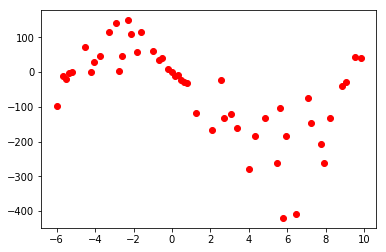

In [14]:
# Choose a random sample
x_sub, y_sub = zip(*random.sample(list(zip(x, y)), 50))

# Plot the data
plt.plot(x_sub, y_sub, 'ro')

# Find the coefficients of a polynomial curve fitted to the data
a = np.polyfit(x_sub, y_sub, 3)

# Generate the points of the curve for the given input data
yfit3 = a[0]*x**3 + a[1]*x**2 + a[2]*x + a[3]

print(a)

Many applications involve finding the roots of a function $f(x)$.

That is, we want to find a value or values for $x$ such that $f(x)=0$.

For some functions, the roots are easy to find analytically.
<br>For example, the function used to generate the data above is:

$f(x) = 2x^3 - 8x^2 - 96x$

As each term is divisible by $2x$, we can easily factorise this function to:

$f(x)=(2x)(x + 4)(x - 8)$

giving us roots as 0, -4, and 8.



After adding some noise to the data set, the derived function is not so strightforward.

We can use the functions `roots` to find the roots of a polynomial function.

In [15]:
r = np.roots(a)
print(r)

[ 9.42061636 -5.18095511  0.14445472]


We can plot the polynomial equation and the roots to check the solution:

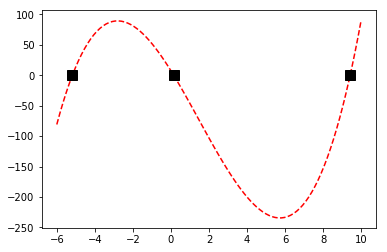

In [16]:
z = np.zeros(len(r))     

`roots` ony works for polynomials, it does not work for any other nonlinear function.


For a polynomial function, we know that there will be many roots as the order of the function e.g. the cubic function above will have three roots.

It is easy to verify this visually from the plot above.

To count the number of roots in a function *computationally* we can:
- find the number of solutions if we are using `root` i.e. ```python len(r)```
- count the number of times that the sign changes in the interval.


#### Counting roots using sign changes.
If we multiply each pair of neightbouring elements together, wherever the product is a negative value, this indicates a sign change.

*(You only get a negative number from the product of a positive and negative number).*

In [17]:
print(np.sum(y[:-1] * y[1:] < 0))

3


##### What does this code do?
>`y[:-1] * y[1:]`

This gives us a new array with the product of each neighbouring pair.

<br>
>`y[:-1] * y[1:] < 0`

We then remove all non-negative values...

<br>
>`np.sum(y[:-1] * y[1:] < 0)`

...and finally count how many values are left.

## Iterative Solutions
<a id='IterativeSolutions'></a>
Nonlinear algebra problems are typically solved using an iterative process that terminates when the solution is found within a specified tolerance. 

This process is hidden from the user. 

For the iteration to work, an initial guess is usually required from the user.

For example, consider the following electro-chemical equation.

The product is a function of the ratio of the reactants:

$f(C_a) = V - \frac{(C_{a0} - C_a)}{(k * C_a^2)}$


We can define a function for the reaction:

In [58]:
def func(Ca):
    return V - (Cao - Ca)/(k * Ca**2)

By plotting the function for a range of values and setting the lower y-limit to zero we can make a guess at the root of the function.

In [21]:
# unit definitions
m=1.0
L = m**3 / 1000.0
mol = 1.0
s=1.0

# example data
Cao=2.0*mol/L
V=10.0*L
k= 16

# a range of input values
c = np.linspace(0.001, 2) * mol / L

In [22]:
plt.plot(c, func(c))
plt.xlabel('Ca (mol/m^3)')
plt.xlabel('f(Ca)')

# set the lower limit
plt.ylim([0, 0.012])

NameError: name 'func' is not defined

It looks like the answer is near `Ca = 125`

We can now use the function `fsolve` to run an iterative solver on the input data.

In [61]:
from scipy.optimize import fsolve

cguess = 125

c_root = fsolve(func, cguess)

print(c_root)


[108.72206355]


We can check our solution by finding the value of the function at the value returned as the estimate for the root.

In [62]:
print(func(c_root))               

[6.38378239e-16]


The answer is very close to zero.

The *tolerance* of the iterative solver can be set by the user using the argument `xtol` which has a default value of `xtol=1.49012e-08`.

*__Tolerance:__ The calculation will terminate if the relative error between two consecutive iteration is at most xtol.*

What is actually happening when the solver is run?

Many mathematical algorithms exist for estimating a root of a function.

One such algorithm is the Bisection method.

## Bisection (using `while` loops) 
<a id='Bisection'></a>
Bisection is an iterative method for approximating a root of a function $y = F(x)$ 

We know the roots are found where the line of the function F(x) __crosses__ the x axis (red dot).

We also know that a crossing point is found where the product of two neighbouring values id equal to zero.

<img src="img/bisection_method.png" alt="Drawing" style="width: 300px;"/>




For example, the initial interval can be determined by multiplying all neighbouring points. 

Earlier, we found the *number* of roots using:

    np.sum(y[:-1] * y[1:] < 0)

If `y` is the value of $f(x)$:

    # index of crossing points
    i = np.argwhere(y[:-1] * y[1:] < 0)
    
    # lower value of each interval
    int_low = x[:-1][i]
    
    # upper value of each interval
    int_high = x[1:][i]



An initial interval is determined within which the crossing point lies.

The value of the function at the mid-point or *bisection* of the interval is found.

If it is not close enough (within a defined tolerance) to zero (i.e. the crossing point), we find wether the crossing point lies in the top or bottom half of the interval. 

The top or bottom half (containig the crossing point) becomes the new interval.

The function repeats.

<img src="img/bisection_method_simple.png" alt="Drawing" style="width: 300px;"/>

In the example shown, the midpoint (x$_{mid}$) of a$_1$  and b$_1$ is b$_2$ 
<br>$F(a_1) \times F(b_2) =$ negative
<br>$F(b_1) \times F(b_2) =$ positive

So the new increment is between a$_1$ and b$_2$.

By repeating this process, the value of F(x$_{mid}$) should become closer to zero with each iteration.



Consider the function:

$$
F(x) = 4x^3 - 3x^2 - 25x - 6
$$

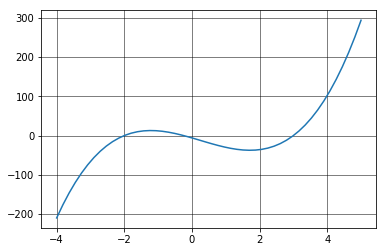

In [16]:
def F(x):
    return (4*x**3) - (3*x**2) - (25*x) - 6

x = np.linspace(-4, 5)
y = F(x)
plt.plot(x,y)
plt.grid(color='k', linestyle='-', linewidth=0.5)

We can see that a root exists between 2 and 4.

We can also show this programmatically:

In [18]:
i = np.argwhere(y[:-1] * y[1:] < 0)

# lower and upper bounds of the interval at each crossing point
int_low  = x[:-1][i]
int_hi = x[1:][i]
                
print(int_low)
print()
print(int_hi)

[[-2.16326531]
 [-0.32653061]
 [ 2.97959184]]

[[-1.97959184]
 [-0.14285714]
 [ 3.16326531]]


### Example: Bisection Algorithm
<a id='ExampleBisectionAlgorithm'></a>
We can write a function to find the root solving the bisection method.
1. Create a function (arguments and doc string)
1. Check that the upper and lower initial values are of opposite sign.
1. Find the midpoint 
1. Return midpoint if solution is within tolerance...
1. ...reset high and low if not.
1. Set maximum number of iterations


*The full solution is given below*

In [19]:
# create a function
def bisection(f, lo, hi, tol=1e-6, nmax=30):
    """Estimates roots of function"""
    # check lo and hi are of opposite sign
   if (f(lo) * f(hi) < 0):
        
        # find the midpoint of lo and hi
        xmid = (lo + hi) /2

        # loop until max iterations reached


            # show value of function at mid point
           print(round(xmid), 5)
        
           for i range(nmax):

                # if value within tolerance return solution
                if (abs(f(xmid) < tol)):
                    return xmid

                # if crossing point between mid and lo, mid is new hi
                elif f(mid) * f(lo) < 0:
                    hi = xmid
                    xmid = (lo + hi) /2

                # if crossing point between mid and hi, mid is new lo 
                else:
                    lo = xmid
                    xmid = (lo + hi) /2
            
    else:
        print("invalid values")


IndentationError: unindent does not match any outer indentation level (<ipython-input-19-b3fbb95abbca>, line 5)

In [20]:
# create a function
def bisection(f, lo, hi, tol=1e-6, nmax=30):
    """
    Estimates the root of a function, F(x), using two initial values; x = a and x = b, where F(a)F(b) < 0
    """
    # check lo and hi are of opposite sign
    if (f(lo) * f(hi) < 0): 
        
        # find the midpoint of lo and hi
        xmid = (lo + hi) / 2

        # loop until max iterations reached
        for i in range(nmax):

            # show value of function at mid point
            # print(round(f(xmid), 5))

            # if value within tolerance return solution
            if (abs(f(xmid)) < tol):
                return xmid

            # if crossing point between mid and lo, mid is new hi
            elif f(xmid) * f(lo) < 0:
                hi = xmid
                xmid = (lo + hi)/2
                
            # if crossing point between mid and hi, mid is new lo 
            else:
                lo = xmid
                xmid = (lo + hi)/2  
                
    else:
        print("invalid starting values, must be of opposite sign")
 

r = bisection(F, int_low[2][0], int_hi[2][0])
print("root = ", round(r, 4))

# for low, high in zip(int_low, int_hi):
#     r = bisection(F, low[0], high[0])
#     print("root = ", round(r, 4))



root =  3.0


Compare this solution to the numpy function:

In [13]:
r = np.roots([4, -3, -25, -6])
print(r)

[ 3.   -2.   -0.25]


<a id='ImportingSpecificAlgorithms'></a>
## Importing Specific Algorithms  

Specific root finding algorithms, including bisection, can also be imported from libraries such as Scipy. 

The package `scipy.optimize` contains a number of functions for estimating the roots of a function given an initial estimate or interval:
 - `scipy.optimize.fsolve` : 1 initial guess
 - `scipy.optimize.bisect` : 2 initial guesses (upper and lower interval bound)
 - `scipy.optimize.brentq` : 2 initial guesses (upper and lower interval bound)

In [68]:
import scipy
from scipy.optimize import bisect
from scipy.optimize import brentq

root = scipy.optimize.bisect(F, int_low[2][0], int_hi[2][0])
print(root)

root = scipy.optimize.brentq(F, int_low[2][0], int_hi[2][0])
print(root)

3.0000000000010396
2.9999999999999982


## Finding the nth Root of a Periodic Function 
<a id='FindingnthRootPeriodicFunction'></a>
For periodic functions, the number of roots can be infinite. 

Methods such as bisection can be useful for finding:
- the closest root to a specific point.
- the $n$th root, where $n$ is a specific value.

### Finding the Closest Root to a Point
__Example:__ Find the root of the cosine function in the vicinity of -5.

<img src="img/cos_graph.png" alt="Drawing" style="width: 500px;"/> 


In [69]:
from numpy import pi as pi

root = scipy.optimize.bisect(np.cos, -5, -2.5)
print(root/pi, 'pi')

root = scipy.optimize.brentq(np.cos, -5, -2.5)
print(root/pi, 'pi')


-1.4999999999999407 pi
-1.5 pi


### Finding the nth root of a periodic function
The library `pycse` has useful functions for dealing with repeating or periodic functions. 

However, unlike packages such as `numpy, scipy` and `matplotlib`, `pycse` is not automatically installed with anaconda.



We can use `pip` to install python packages.

Instrauctions for Windows and Mac are given below:

<a id='Installingpip'></a>
## Installing `pip`
To install pip...

##### On Windows 

1. Open the Anaconda Prompt from the terminal.
<p align="center">
  <img src="img/anaconda_prompt.png" alt="Drawing" style="width: 300px;"/>
</p>

1. The window that opens will look like the command line. In the window type the following code then press 'Enter':
>`conda install -c anaconda pip`

##### On mac

1. Open a terminal. 

1. Type the following code then press 'Enter':
>`conda install -c anaconda pip`



When the installation completes, you are ready to install `pycse`.

You only need to install `pip` once.

Now, whenever you want to install a new package, follow the instructions below. 

For example, to install `pycse`...

## Installing `pycse`
##### On Windows 


1. In the __command line / terminal__, type the following code then press 'Enter':
>`pip install pycse
pip install quantities
pip install uncertainties`

##### On mac


1. In the __command line / terminal__, type the following code then press 'Enter':
>`pip install pycse
pip install quantities
pip install uncertainties`



To check that `pycse` has installed run: 

In [ ]:
import pysce



If no error is generated, `pysce` has installed successfully.

An alternative solution (for example, if the above installation instructions do not work), `pysce` can be installed by running the following cell in Jupyter notebook:

In [8]:
import sys
!{sys.executable} -m pip install pycse
!{sys.executable} -m pip install quantities
!{sys.executable} -m pip install uncertainties

distributed 1.21.8 requires msgpack, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.


To complete the example, import the following packages:

In [10]:
import pycse
from pycse import odelay
from scipy.special import jn, jn_zeros

### Finding the maxima and minima

In [19]:
#from pycse import *
import numpy as np
direction = 1

# dCadt(Ca, t): return -k * Ca**2
# stop(Ca, t):
# isterminal = True
# 
# value=1.0-Ca
# return value, isterminal, direction

def ode(y, x):    
    return np.sin(x) * np.exp(-0.05 * x)

def minima(y, x):
    """
    Approaching a minumum, dydx is negatime and going to zero. 
    Our event function is increasing
    """
    value = ode(y, x)
    direction = 0
    isterminal = False




def maxima(y, x):
    """ 
    Approaching a maximum, dydx is positive and going to zero. 
    Our event function is decreasing
    """    
    value = ode(y, x)
    direction = -1
    isterminal = False
    return value, isterminal, direction

xspan = np.linspace(0, 20, 100) 
y0=0

maxima(y0, xspan)

# X, Y, XE, YE, IE = odelay(ode, y0, xspan, events=[minima, maxima])
# print(IE)

# plt.plot(X, Y)
# # blue is maximum, red is minimum
# colors = 'rb'
# for xe, ye, ie in zip(XE, YE, IE):
#     plt.plot([xe], [ye], 'o', color=colors[ie])


(array([ 0.        ,  0.1986323 ,  0.38527414,  0.55263139,  0.6943342 ,
         0.80517571,  0.88129892,  0.92032541,  0.92142173,  0.88530223,
         0.81416918,  0.71159417,  0.58234654,  0.43217691,  0.2675654 ,
         0.09544554, -0.07708478, -0.24305303, -0.39589099, -0.52969185,
        -0.63943536, -0.72117277, -0.77216478, -0.79096796, -0.77746705,
        -0.73285309, -0.65954919, -0.5610881 , -0.44194741, -0.3073499 ,
        -0.16303784, -0.01503077,  0.13062299,  0.26809107,  0.39198818,
         0.49758452,  0.58098362,  0.63926294,  0.67057236,  0.67418744,
         0.65051613,  0.60105963,  0.52832999,  0.43572844,  0.32739035,
         0.20800357,  0.08260823, -0.04361384, -0.16555104, -0.27836699,
        -0.37769019, -0.45978124, -0.52167109, -0.56126553, -0.57741219,
        -0.56992823, -0.53958835, -0.48807435, -0.41788909, -0.33223906,
        -0.2348909 , -0.13000808, -0.02197496,  0.0847846 ,  0.18598664,
         0.27765722,  0.3562866 ,  0.41896165,  0.4

In [ ]:
## 

## Coupled Non-Linear Equations (continued)
<a id='CoupledNonLinearEquations'></a>
Finally, we can use the function `fsolve` to solve higher order equivalents to the coupled systems of linear equations we started at the beginning of today's class.

Consider the equations:

\begin{align*}
y &= x^2\\
y &= 8-x^2\\
\end{align*}


We need to setup a function that is equal to zero at the solution. 

\begin{align*}
0 &= y - x^2\\
0 &= y - 8-x^2\\
\end{align*}

We have two equations, so the function must return two values. 

There are two variables, so the argument to the function will be an array of values.

In [6]:
from scipy.optimize import fsolve

def objective(guess): 
    x, y = guess         # unpack the array into the arguments
    z1 = y - x**2        # first equation
    z2 = y - 8 + x**2    # second equation
    return [z1, z2]      # list of zeros



We can then use `fsolve` we did for root finding.

Again, we need an initial guess for the solution.

In [4]:
guess = [1, 1] # initial guesses
sol = fsolve(objective, guess)
print(sol)



[2. 4.]


The closeness of returned argument of the function `objective` to zero is evaluated by the solver.

There may be more than one solution:

In [5]:
guess = [-1, -1]  # initial guesses
sol = fsolve(objective, guess)
print(sol)



[-2.  4.]


<a id='Summary'></a>
# Summary
- `numpy.linalg.solve()` : solutions to coupled linear and non-linear equations.
- `numpy.roots()` : roots of a polynomial function.
- Nonlinear algebra problems are typically solved using an iterative process that terminates when the solution is found within a specified tolerance and therefore require an initial guess from the user.
- Some interative solvers:
     - `scipy.optimize.fsolve` : 1 initial guess
     - `scipy.optimize.bisect` : 2 initial guesses (upper and lower interval bound)
     - `scipy.optimize.brentq` : 2 initial guesses (upper and lower interval bound)
- `scipy.optimize.fsolve()` can also be used to solve couple nonlinear equations.

<a id='TestYourselfExercises'></a>
# Test-Yourself Exercises

Compete the Test-Youself exercises below.

Save your answers as .py files and email them to:
<br>philamore.hemma.5s@kyoto-u.ac.jp

## Test-Yourself Exercise : <a name="back1"></a>Fitting a wave
Consider the following four measurements of quantity $y$ at time $t$: 
<br>$(t_0,y_0)=(0,3)$
<br>$(t_1,y_1)=(0.25,1)$
<br>$(t_2,y_2)=(0.5,-3)$
<br>$(t_3,y_3)=(0.75,1)$. 

The measurements are part of a wave with the equation:

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

where $a$, $b$, $c$, and $d$ are unknown constants. 

1. Build a system of four linear equations and solve for the four parameters. 

1. Creates a plot of the wave for $t$ going from 0 to 1 and show the four measurements with dots.

a,b,c,d:  [ 1.  2.  1. -1.]


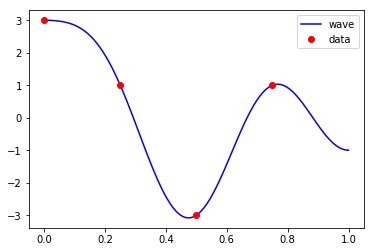

In [73]:
import numpy as np
t1 = np.array([0, 0.25, 0.5, 0.75])
y1 = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
r = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * t1[i]), np.cos(2 * np.pi * t1[i]), \
           np.cos(3 * np.pi * t1[i]), np.cos(4 * np.pi * t1[i])  
    r[i] = y1[i]
sol = np.linalg.solve(A, r)
print('a,b,c,d: ',sol)

t2 = np.linspace(0, 1, 100)
y2 = sol[0] * np.cos(1 * np.pi * t2) + sol[1] * np.cos(2 * np.pi * t2) + \
    sol[2] * np.cos(3 * np.pi * t2) + sol[3] * np.cos(4 * np.pi * t2)
plt.plot(t2, y2, 'b', label='wave')
plt.plot(t1, y1, 'ro', label='data')
plt.legend(loc='best');

## Test-Yourself Exercise : Root Finding

1. Estimate the root of the function $f(x) = 2\sin^2 x - 3\sin x + 1$:
<br> &nbsp; &nbsp; &nbsp; (i) between 0 and $\frac{\pi}{6}$
<br> &nbsp; &nbsp; &nbsp; (ii) between 1.5 and 2
<br> &nbsp; &nbsp; &nbsp; (iii) between $\frac{3}{4}\pi$ and $\pi$

1. Estimate the root of the function $3cos(x + 1.4)$
<br> &nbsp; &nbsp; &nbsp; (i) between 10 and 15
<br> &nbsp; &nbsp; &nbsp; (ii) between 20 and 25

[0.52359878 1.57079631 2.61799388]
[0.00000000e+00 0.00000000e+00 1.11022302e-16]


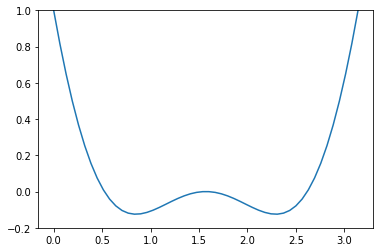

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
#1
def func(x):
    return 2*((np.sin(x))**2) - 3*np.sin(x) + 1
#plot to make a guess
x1 = np.linspace(0,np.pi)
plt.plot(x1, func(x1))
plt.ylim([-0.2,1])
#use the function fsolve
from scipy.optimize import fsolve
x1guess = 0.5,1.5,2.7
x1_root = fsolve(func, x1guess)
print(x1_root)
#check the solution
print(func(x1_root)) 


[12.73716694 22.1619449 ]
[ 1.24221895e-13 -9.33496541e-14]


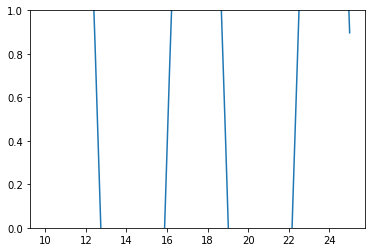

In [16]:
#2
def func1(x):
    return 3*np.cos(x+1.4)
#plot to make a guess
x2 = np.linspace(10,25)
plt.plot(x2, func1(x2))
plt.ylim([0,1])
#use the function fsolve
from scipy.optimize import fsolve
x2guess = 13,22
x2_root = fsolve(func1, x2guess)
print(x2_root)
#check the solution
print(func1(x2_root)) 